In [3]:
import pandas as pd

df = pd.read_csv("/Users/hadi/Documents/FIDS/data/processed/dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [8]:
df['Label'].value_counts()

BENIGN                                                                                                                                                                                                                                                                                                                                                                                                                       2271320
DoS Hulk                                                                                                                                                                                                                                                                                                                                                                                                                      230124
PortScan                                                                                                                                                      

In [59]:
import joblib

v = joblib.load('/Users/hadi/Documents/FIDS/data/processed/test.pkl')
u = joblib.load('/Users/hadi/Documents/FIDS/data/processed/train.pkl')
c_pred = joblib.load('/Users/hadi/Documents/FIDS/data/final/centralized_predictions.pkl')

In [60]:
u['X'].shape, u['y'].shape

((2686482, 78), (2686482, 15))

In [61]:
v['X'].shape, v['y'].shape

((141394, 78), (141394, 15))

In [62]:
c_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(classification_report(v['y'].argmax(axis=1), c_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113566
           1       1.00      0.74      0.85        98
           2       1.00      1.00      1.00      6401
           3       0.99      1.00      1.00       515
           4       1.00      1.00      1.00     11506
           5       0.99      0.99      0.99       275
           6       0.99      1.00      1.00       290
           7       1.00      1.00      1.00       397
           9       1.00      0.50      0.67         2
          10       0.99      1.00      1.00      7940
          11       1.00      1.00      1.00       295
          12       0.70      0.89      0.78        75
          13       1.00      1.00      1.00         1
          14       0.50      0.15      0.23        33

    accuracy                           1.00    141394
   macro avg       0.94      0.88      0.89    141394
weighted avg       1.00      1.00      1.00    141394



In [64]:
cm = confusion_matrix(v['y'].argmax(axis=1), c_pred.argmax(axis=1))

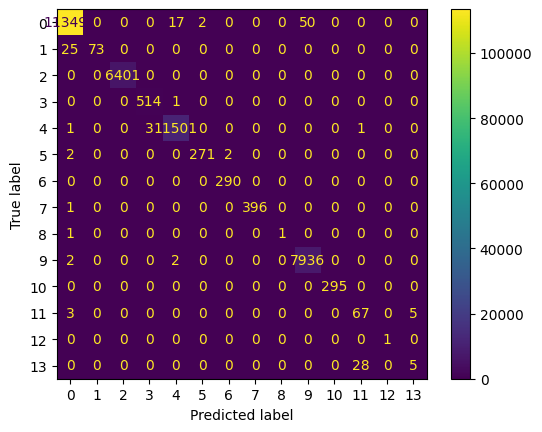

In [65]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
